# Dhruv Rana
# Programming Exercise \#3
---

# Preamble

In [1]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [2]:
# import relevant Python libraries

import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Non-centered Data and Principal Component Analysis (PCA)**

## 1.1

In [3]:
### Your code for 1.1 goes here ###
np.random.seed(1) # fix the seed so it does not keep changing when we re-run the code

meanA = 0
varA = 1
stdA =  varA**(1/2) #sqrt(var)

A = np.random.normal(loc=meanA,scale=stdA,size=(3,2))

meanC = 0
varC = 3
stdC =  varC**(1/2) #sqrt(var)
c = np.random.normal(loc=meanC,scale=stdC,size=(3,1))

## 1.2

In [4]:
### Your code for 1.2 goes here ###
X = np.zeros((250,3))

for i in range (250):
    b_i =  np.random.normal(loc=0,scale=1,size=(2,1)) # diffrent b_i for each i
    X[i] = (np.matmul(A,b_i) + c).T  #A*b_i + c as rows of X


## 1.3

In [5]:
### Your code for 1.3 goes here ###
print(f"The rank of X is : {np.linalg.matrix_rank(X)}")

The rank of X is : 3


## 1.4

_c = -mean(A), guarantee that the data remains centered or c = -mean(X)_

## 1.5

### (a)

In [6]:
### Your code for 1.5(a) goes here ###
U,sigma,V_t = np.linalg.svd(X)

U_PCA = V_t.T[:,0:2]
print("The first two principal component directions are first two columns of right singular matrix:-")
print(U_PCA)

The first two principal component directions are first two columns of right singular matrix:-
[[-0.89048636 -0.12195814]
 [ 0.30066469  0.56539243]
 [-0.34151836  0.81575585]]


### (b)

In [7]:
### Your code for 1.5(b) goes here ###
X_hat = np.zeros((250,3))

for i in range (250):
    X_hat[i] = np.matmul(U_PCA,np.matmul(U_PCA.T,X[i])) # U U.T X_i

### (c)

In [8]:
### Your code for 1.5(c) goes here ###
proj_error = np.linalg.norm(X-X_hat)
print("The projection error is : {0}".format(proj_error))

The projection error is : 1.72919971846999


## 1.6

In [9]:
### Your code for 1.6 goes here ###
m = np.mean(X,axis=0)
X_cent = X - m

U_cent,sigma_cent,V_t_cent = np.linalg.svd(X_cent)

U_PCA_cent = V_t_cent.T[:,0:2]

X_hat_cent = np.zeros_like(X)

for i in range (250):
    X_hat_cent[i] = np.matmul(U_PCA_cent,np.matmul(U_PCA_cent.T,X[i]-m)) + m
    
proj_error_cent = np.linalg.norm(X-X_hat_cent)
print("The projection error is : {0}".format(proj_error_cent))

The projection error is : 3.345803112598351e-14


# **2. Preprocessing (Centering) and PCA Using `scikit learn`**

In [10]:
# Import 
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp

## 2.1

In [11]:
### Your code for 2.1 goes here ###
mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)
skl_centered_X = mean_datascaler.fit_transform(X)

## 2.2

In [12]:
### Your code for 2.2 goes here ###
print("Mean calculated from Section 1.6 :-")
print(m)

m_skl = mean_datascaler.mean_
print("\nMean calculated from sklearn :-")
print(m_skl)

Mean calculated from Section 1.6 :-
[ 3.11248163 -1.38343372  0.54545081]

Mean calculated from sklearn :-
[ 3.11248163 -1.38343372  0.54545081]


## 2.3

In [13]:
### Your code for 2.3 goes here ###
print("The error between sklearn and calualted mean is : {0}".format(np.linalg.norm(m-m_skl)))

The error between sklearn and calualted mean is : 0.0


## 2.4

In [14]:
### Your code for 2.4 goes here ###
data_pca = skldecomp.PCA(n_components=2, svd_solver='full')
skl_features = data_pca.fit_transform(skl_centered_X)

## 2.5

In [15]:
### Your code for 2.5 goes here ###
print("PCA from Section 1.6 :-")
print(U_PCA_cent.T)

PCA_skl = data_pca.components_
print("\nPCA from skl :-")
print(PCA_skl)

PCA from Section 1.6 :-
[[ 0.44658352  0.25395308  0.8579458 ]
 [-0.74877381  0.63097898  0.202986  ]]

PCA from skl :-
[[-0.44658352 -0.25395308 -0.8579458 ]
 [-0.74877381  0.63097898  0.202986  ]]


## 2.6

In [16]:
### Your code for 2.6 goes here ###
X_hat_skl = data_pca.inverse_transform(skl_features) + m_skl

## 2.7

In [17]:
### Your code for 2.7 goes here ###
print("The error between sklearn and calualted projected data is : {0}".format(np.linalg.norm(X_hat_cent-X_hat_skl)))

The error between sklearn and calualted projected data is : 2.8781822625252244e-14


# **3. PCA on a Real-world Dataset**

In [18]:
### Your code for loading the dataset using load_digits goes here ###
from sklearn.datasets import load_digits

X_digit, label = load_digits(n_class=1, return_X_y=True)

## 3.1

_The shape of X is 178 x 64, which means we have 178 samples and each samples has 64 features (8x8).\
Thus n = 178  &  p = 64._

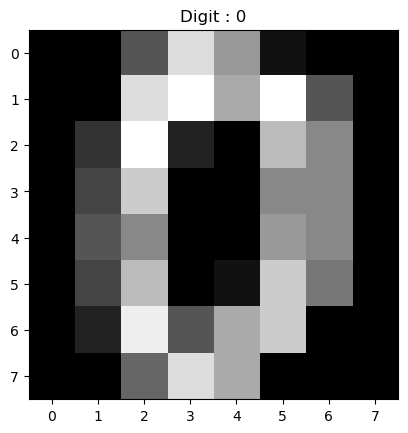

In [19]:
### Your code for 3.1 goes here ###
img = np.reshape(X_digit[0],(8,8))
plt.imshow(img,cmap="gray")
plt.title(f"Digit : {label[0]}")
plt.show()

## 3.2

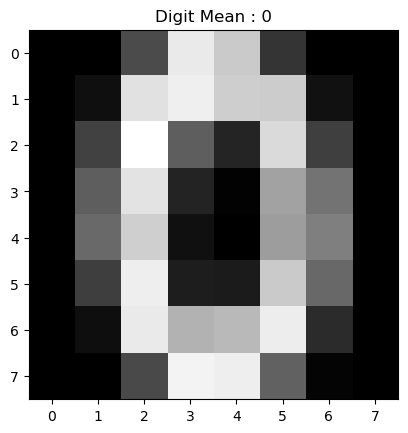

In [20]:
### Your code for 3.2 goes here ###
digit_mean = np.mean(X_digit,axis=0)
plt.imshow(np.reshape(digit_mean,(8,8)),cmap="gray")
plt.title(f"Digit Mean : {label[0]}")
plt.show()

## 3.3

In [21]:
### Your code for 3.3 goes here ###
X_bar  = X_digit - digit_mean
U_digit, sigma_digit, V_t_digit = np.linalg.svd(X_bar)

## 3.4

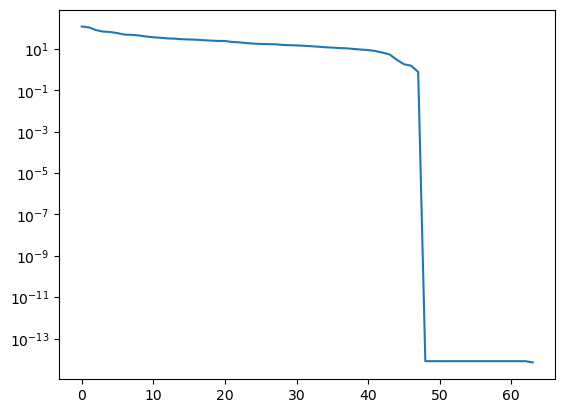

In [22]:
### Your code for 3.4 goes here ###
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(sigma_digit)
ax.set_yscale('log')

## 3.5

In [23]:
### Your code for 3.5 goes here ###
k = 1

for i in range (len(sigma_digit)):
    energy_captured = ((sigma_digit[0:i]**2).sum())/((sigma_digit**2).sum()) 
    if(energy_captured >= 0.9) :
        k = i
        break

print(f"The k that capture more than or equal to 0.9 is : {k}")

The k that capture more than or equal to 0.9 is : 18


## 3.6

In [24]:
### Your code for 3.6 goes here ###
digit_mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)
digit_skl_centered_X = digit_mean_datascaler.fit_transform(X_digit)

digit_data_pca = skldecomp.PCA(n_components=0.9, svd_solver='full')
digit_skl_features = digit_data_pca.fit_transform(digit_skl_centered_X)

print(f"The K that capture grater than or equal to 0.9 is : {digit_data_pca.n_components_}")

The K that capture grater than or equal to 0.9 is : 18


## 3.7

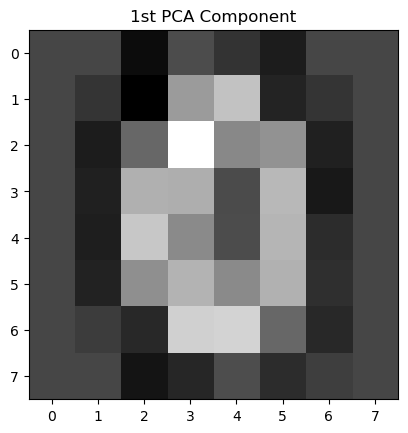

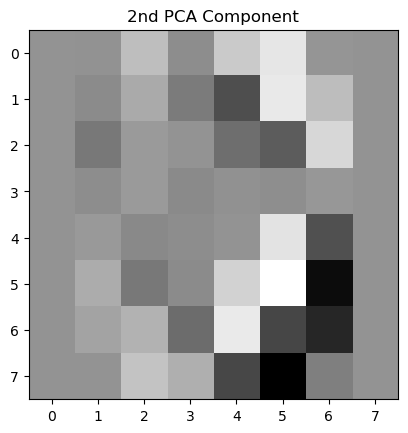

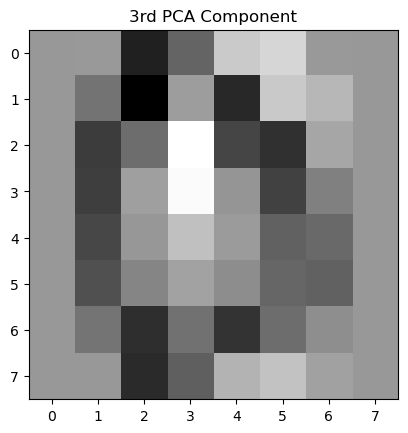

In [25]:
### Your code for 3.7 goes here ###
plt.imshow(np.reshape(digit_data_pca.components_[0],(8,8)),cmap="gray")
plt.title("1st PCA Component")
plt.show()

plt.imshow(np.reshape(digit_data_pca.components_[1],(8,8)),cmap="gray")
plt.title("2nd PCA Component")
plt.show()

plt.imshow(np.reshape(digit_data_pca.components_[2],(8,8)),cmap="gray")
plt.title("3rd PCA Component")
plt.show()

## 3.8

In [26]:
### Your code for 3.8 goes here ###
digit_data_pca = skldecomp.PCA(n_components=3, svd_solver='full')
digit_skl_features = digit_data_pca.fit_transform(digit_skl_centered_X)

## 3.9

C:\Users\dhruv\AppData\Local\Temp\ipykernel_25960\1834119214.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


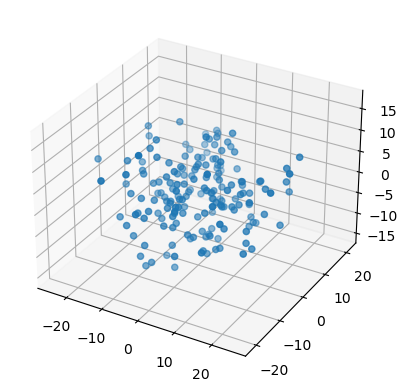

In [27]:
### Your code for 3.9 goes here ###
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(digit_skl_features[:,0],digit_skl_features[:,1],digit_skl_features[:,2])
fig.show()

## 3.10

In [28]:
### Your code for 3.10 goes here ###
X_digit_reconstruct = digit_data_pca.inverse_transform(digit_skl_features) + digit_mean_datascaler.mean_

## 3.11

In [29]:
### Your code for 3.11 goes here ###
print("The projection error is : {0}".format(np.linalg.norm(X_digit-X_digit_reconstruct)**2))

print("Sum of unused singular values sqaured is : {0}".format( ((sigma_digit[3:]**2).sum()) ))

The projection error is : 36050.010605737116
Sum of unused singular values sqaured is : 36050.01060573711


## 3.12

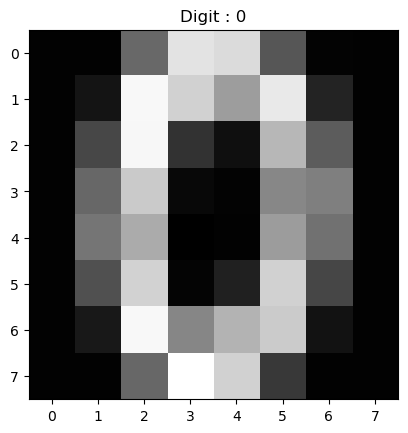

In [30]:
### Your code for 3.12 goes here ###
img = np.reshape(X_digit_reconstruct[0],(8,8))
plt.imshow(img,cmap="gray")
plt.title(f"Digit : {label[0]}")
plt.show()

# **4. PCA as a Denoising Tool**

## 4.1

In [31]:
### Your code for 4.1 goes here ###
np.random.seed(1)

mean_a = 0
var_a = 1
std_a =  var_a**(1/2) #sqrt(var)

a = np.random.normal(loc=mean_a,scale=std_a,size=(3,1)) 

## 4.2

In [32]:
### Your code for 4.2 goes here ###
X_data = np.zeros((100,3))

for i in range (100):
    b_i =  np.random.normal(loc=0,scale=4**(1/2),size=(1,1))
    X_data[i] = (np.matmul(a,b_i)).T 

## 4.3

In [33]:
### Your code for 4.3 goes here ###
Y_noisy_data = np.zeros((100,3))

for i in range (100):
    n_i =  np.random.normal(loc=0,scale=0.05**(1/2),size=(1,3))
    Y_noisy_data[i] = X_data[i] + n_i  

## 4.4

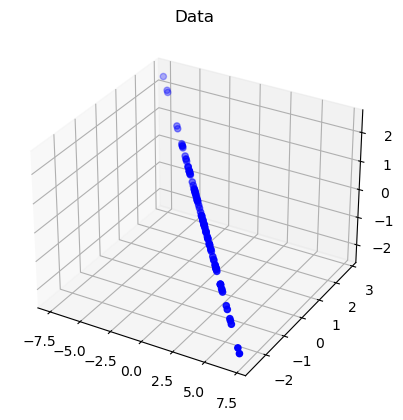

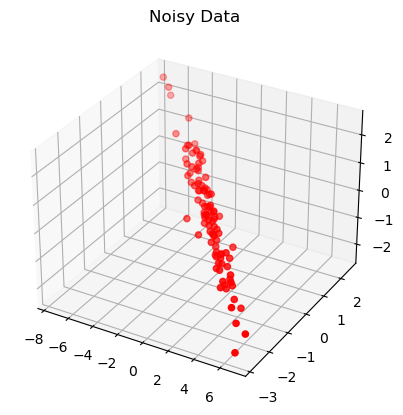

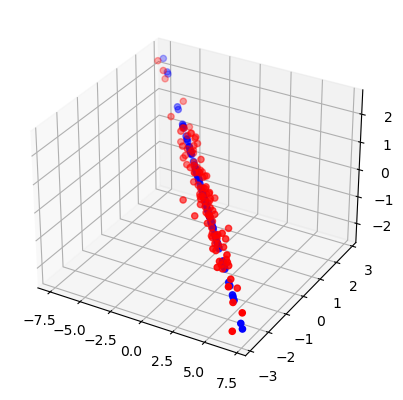

In [34]:
### Your code for 4.4 goes here ###
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_data[:,0],X_data[:,1],X_data[:,2],c="blue")
plt.title("Data")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Y_noisy_data[:,0],Y_noisy_data[:,1],Y_noisy_data[:,2],c="red")
plt.title("Noisy Data")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Y_noisy_data[:,0],Y_noisy_data[:,1],Y_noisy_data[:,2],c="red")
ax.scatter(X_data[:,0],X_data[:,1],X_data[:,2],c="blue")

## 4.5

In [35]:
### Your code for 4.5 goes here ###
noisy_data_pca = skldecomp.PCA(n_components=np.linalg.matrix_rank(X_data), svd_solver='full') 
denoised_data = noisy_data_pca.inverse_transform(noisy_data_pca.fit_transform(Y_noisy_data))

## 4.6

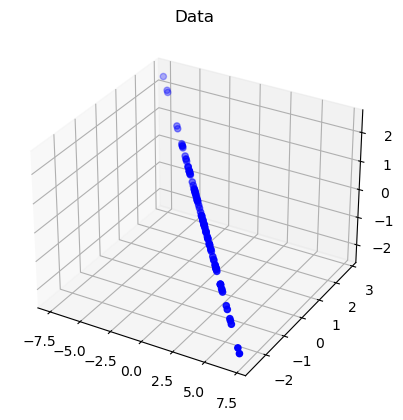

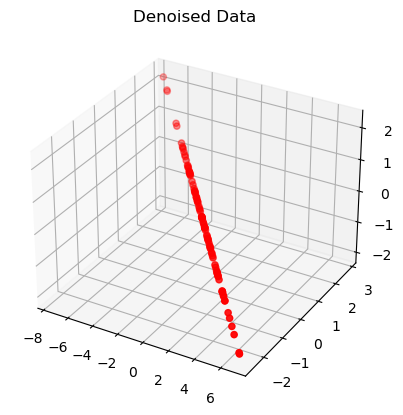

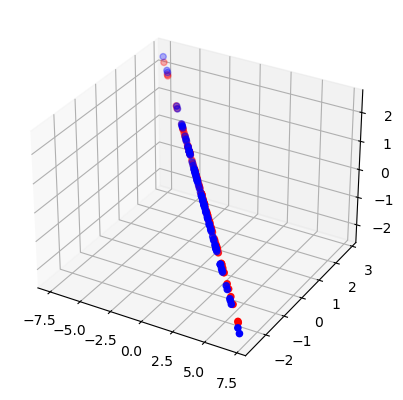

In [36]:
### Your code for 4.6 goes here ###
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_data[:,0],X_data[:,1],X_data[:,2],c="blue")
plt.title("Data")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(denoised_data [:,0],denoised_data [:,1],denoised_data [:,2],c="red")
plt.title("Denoised Data")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(denoised_data [:,0],denoised_data [:,1],denoised_data [:,2],c="red")
ax.scatter(X_data[:,0],X_data[:,1],X_data[:,2],c="blue")

## 4.7

In [37]:
### Your code for 4.7 goes here ###
print("The average projection error btw data and noisy data is : {0}".format(np.linalg.norm(X_data-Y_noisy_data)**2/100))
print("The average projection error btw data and denoised data is : {0}".format(np.linalg.norm(X_data-denoised_data)**2/100))

The average projection error btw data and noisy data is : 0.15175981526527324
The average projection error btw data and denoised data is : 0.05998190294937174


## 4.8

_From this section we learned that PCA can be used a tool to denoise our data. If we now the rank of the original data, we can project
the noisy data onto top #(rank of original data) PCA componets to denoise the obtained data._